### <span style='color:cyan'>Codecademy portfolio project: life expectancy and GDP</span>

In [1]:
# imports
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import seaborn as sns
from scipy.stats import pearsonr
import statsmodels.api as sm

In [2]:
# set path to data & load into df
input_folder = r'/Users/alexandrabrown/Desktop/data_science/datasets/life_expectancy_gpd'
input_file   = 'all_data.csv'
input_path   = os.path.join(input_folder, input_file)

df = pd.read_csv(input_path)
df

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10
...,...,...,...,...
91,Zimbabwe,2011,54.9,1.209845e+10
92,Zimbabwe,2012,56.6,1.424249e+10
93,Zimbabwe,2013,58.0,1.545177e+10
94,Zimbabwe,2014,59.2,1.589105e+10


#### <span style='color:cyan'>Scoping the project:</span>
- There is data on 6 different countries in the dataset
- Data spans 16 years (2000-2015)

<span style='color:cyan'>Potential questions to explore</span>
1. How does life expectancy change over time for the 6 different countries?
2. How does GDP changes over time for the 6 different countries?
3. Is there a correlation between life expectancy and GDP?

In [ ]:
# check to see if there are any missing values in the data
nan_counts = df.isna().sum()
print(nan_counts)

In [3]:
# clean up life exp col name to make it easier to work with
df = df.rename(columns={'Life expectancy at birth (years)': 'Life_exp'})
df

,Country,Year,Life_exp,GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10
...,...,...,...,...
91,Zimbabwe,2011,54.9,1.209845e+10
92,Zimbabwe,2012,56.6,1.424249e+10
93,Zimbabwe,2013,58.0,1.545177e+10
94,Zimbabwe,2014,59.2,1.589105e+10


#### <span style='color:cyan'>1. How does life exp for each country change over time?</span>

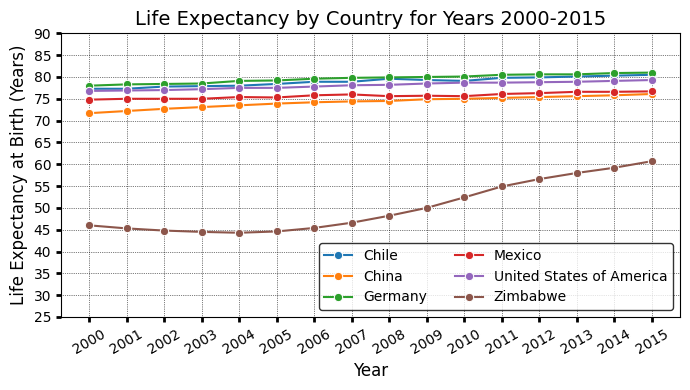

In [4]:
# since there's only 6 countries we can create a line plot (1 line per country)
fig, axs = plt.subplots(figsize=(7,4))
sns.lineplot(data=df, x='Year', y='Life_exp', hue='Country', marker='o')
axs.set_xticks(np.arange(2000, 2016, 1))
axs.set_xticklabels(np.arange(2000, 2016, 1), rotation=30, fontsize=10)
axs.set_yticks(np.arange(25, 95, 5))
axs.tick_params(axis='both', which='major', length=3.5, width=2)
axs.set_xlabel('Year', fontsize=12)
axs.set_ylabel('Life Expectancy at Birth (Years)', fontsize=12)
axs.set_title('Life Expectancy by Country for Years 2000-2015', fontsize=14)
axs.grid(linestyle=':', linewidth=0.5, color='black')
h, l = axs.get_legend_handles_labels()
axs.legend(handles=h, labels=l, ncol=2, edgecolor='black', loc='lower right', title=None)
plt.tight_layout()
plt.show()

#### <span style='color:cyan'>2. How does GDP change over time?</span>

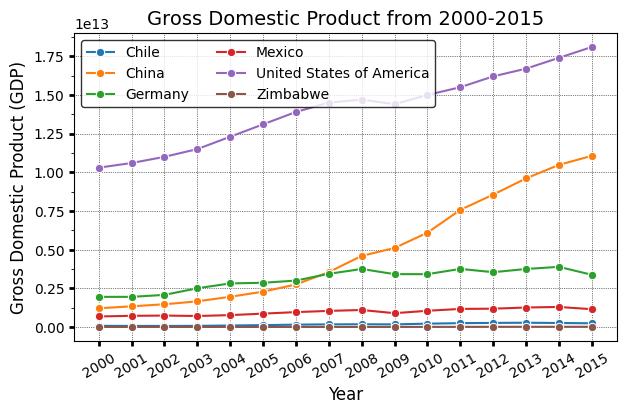

In [5]:
fig, axs = plt.subplots(figsize=(7,4), sharex=True)
sns.lineplot(data=df, x='Year', y='GDP', hue='Country', marker='o')
axs.set_xticks(np.arange(2000, 2016, 1))
axs.set_xticklabels(np.arange(2000, 2016, 1), fontsize=10, rotation=30)
axs.set_yticks(np.arange(0, 2e13, 0.25e13))
axs.set_xlabel('Year', fontsize=12)
axs.set_ylabel('Gross Domestic Product (GDP)', fontsize=12)
axs.tick_params(axis='both', which='major', length=3.5, width=2)
axs.yaxis.set_minor_locator(MultipleLocator(0.125e13))
h, l = axs.get_legend_handles_labels()
axs.legend(handles=h, labels=l, ncol=2, edgecolor='black', title=None, loc='upper left')
axs.grid(linestyle=':', linewidth=0.5, color='black')
axs.set_title('Gross Domestic Product from 2000-2015', fontsize=14)
plt.show()

#### <span style='color:cyan'>3. Is there a correlation between life expectancy and GDP?</span>

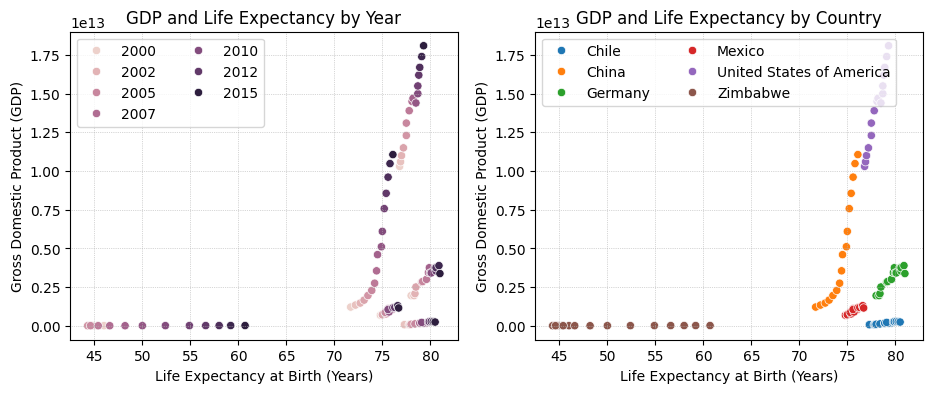

In [6]:
fig, axs = plt.subplots(1, 2, figsize=(11,4))
sns.scatterplot(data=df, x='Life_exp', y='GDP', hue='Year', ax=axs[0])
sns.scatterplot(data=df, x='Life_exp', y='GDP', hue='Country', ax=axs[1])
axs[0].set_xlabel('Life Expectancy at Birth (Years)', fontsize=10)
axs[1].set_xlabel('Life Expectancy at Birth (Years)', fontsize=10)
axs[0].set_ylabel('Gross Domestic Product (GDP)', fontsize=10)
axs[1].set_ylabel('Gross Domestic Product (GDP)', fontsize=10)
axs[0].legend(ncol=2, loc='upper left')
axs[1].legend(ncol=2, loc='upper left')
axs[1].grid(linestyle=':', linewidth=0.5)
axs[0].grid(linestyle=':', linewidth=0.5)
axs[0].set_title('GDP and Life Expectancy by Year', fontsize=12)
axs[1].set_title('GDP and Life Expectancy by Country', fontsize=12)
plt.show()

In [7]:
# quantify the relationship between GDP and life exp using pearson corr
r, p = pearsonr(df['GDP'], df['Life_exp'])
print(f'Pearson correlation coefficient: {r:.3f}, p-value: {p:.3f}')

Pearson correlation coefficient: 0.343, p-value: 0.001


#### <span style='color:cyan'>Since GDP varies a lot for the different countries, log transforming the GDP data my give insight into hard to see trends in the data</span>

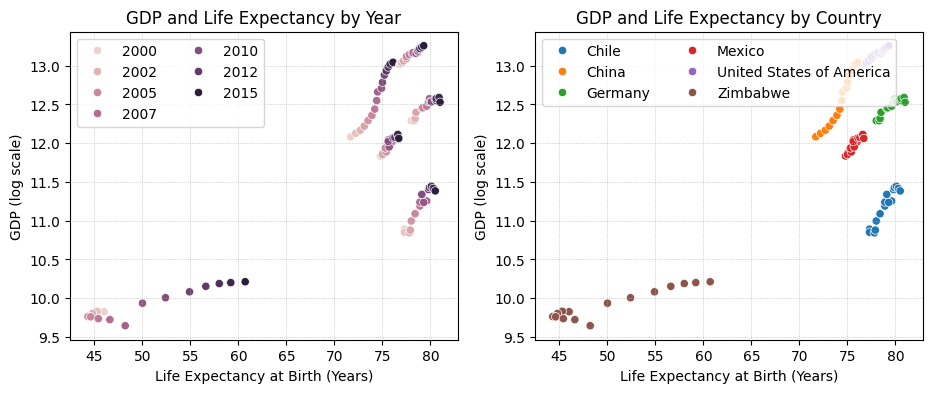

In [8]:
df['log_GDP'] = np.log10(df['GDP'])

fig, axs = plt.subplots(1, 2, figsize=(11,4))
sns.scatterplot(data=df, x='Life_exp', y='log_GDP', hue='Year', ax=axs[0])
sns.scatterplot(data=df, x='Life_exp', y='log_GDP', hue='Country', ax=axs[1])
axs[0].set_xlabel('Life Expectancy at Birth (Years)', fontsize=10)
axs[1].set_xlabel('Life Expectancy at Birth (Years)', fontsize=10)
axs[0].set_ylabel('GDP (log scale)', fontsize=10)
axs[1].set_ylabel('GDP (log scale)', fontsize=10)
axs[0].legend(ncol=2, loc='upper left')
axs[1].legend(ncol=2, loc='upper left')
axs[1].grid(linestyle=':', linewidth=0.5)
axs[0].grid(linestyle=':', linewidth=0.5)
axs[0].set_title('GDP and Life Expectancy by Year', fontsize=12)
axs[1].set_title('GDP and Life Expectancy by Country', fontsize=12)
plt.show()

#### <span style='color:cyan'>4. Compare US and China GDP versus life expectancy growth for the 15 year time period</span>

In [45]:
# use sm ordinary least squares model to get slope an int for china and US GDP vs life exp
us_xvals = df[df['Country'] == 'United States of America'][['Life_exp']]
# add constant bc ols will assume the intercept is at the origin if we don't!
us_xvals = sm.add_constant(us_xvals)

ch_xvals = df[df['Country'] == 'China'][['Life_exp']]
ch_xvals = sm.add_constant(ch_xvals)

# get the y vals (GDP) for both countries
us_yvals = df[df['Country'] == 'United States of America'][['GDP']]
ch_yvals = df[df['Country'] == 'China'][['GDP']]

# build US model & fit
us_model  = sm.OLS(us_yvals, us_xvals)
us_result = us_model.fit()

# build china model & fit
ch_model  = sm.OLS(ch_yvals, ch_xvals)
ch_result = ch_model.fit()

# print the y-int and slope for the US and China models
print(f'US model y-int: {us_result.params.iloc[0]}, slope: {us_result.params.iloc[1]}')
print(f'China model y-int: {ch_result.params.iloc[0]}, slope: {ch_result.params.iloc[1]}')
# print the r2 values 
us_r2 = us_result.rsquared
ch_r2 = ch_result.rsquared
print(f'US R2: {us_r2:.3f}')
print(f'China R2: {ch_r2:.3f}')

US model y-int: -209845563837462.75, slope: 2868477999519.1377
China model y-int: -174263723755638.03, slope: 2413350446128.7725
US R2: 0.964
China R2: 0.825


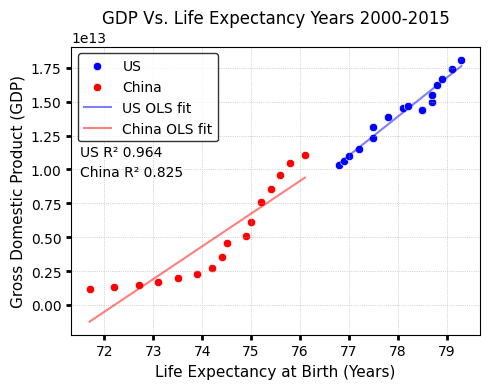

In [80]:
# plot comparison!!
# create us_df & ch_df for easier plotting
us_df = df[df['Country'] == 'United States of America'].reset_index(drop=True)
ch_df = df[df['Country'] == 'China'].reset_index(drop=True)

us_int    = us_result.params.iloc[0]
us_slope  = us_result.params.iloc[1]
# get us x-range and predicted y vals based on line eqn
us_xrange = np.linspace(us_df['Life_exp'].min(), us_df['Life_exp'].max(), 100)
us_ypred  = us_int + us_slope*us_xrange

ch_int    = ch_result.params.iloc[0]
ch_slope  = ch_result.params.iloc[1]
ch_xrange = np.linspace(ch_df['Life_exp'].min(), ch_df['Life_exp'].max(), 100)
ch_ypred  = ch_int + ch_slope*ch_xrange

# filter the df for china and US vals
df_us = df[df['Country'] == 'United States of America'].copy().reset_index(drop=True)
df_ch = df[df['Country'] == 'China'].copy().reset_index(drop=True)

fig, axs = plt.subplots(figsize=(5,4))
sns.scatterplot(data=df_us, x='Life_exp', y='GDP', color='blue', label='US')
sns.scatterplot(data=df_ch, x='Life_exp', y='GDP', color='red', label='China')
plt.plot(us_xrange, us_ypred, color='blue', alpha=0.5, label='US OLS fit')
plt.plot(ch_xrange, ch_ypred, color='red', alpha=0.5, label='China OLS fit')
axs.grid(linestyle=':', linewidth=0.5)
axs.set_title("GDP Vs. Life Expectancy Years 2000-2015")
axs.set_xlabel('Life Expectancy at Birth (Years)', fontsize=11)
axs.set_ylabel('Gross Domestic Product (GDP)', fontsize=11)
axs.tick_params(axis='both', which='major', length=3.5, width=2)
axs.legend(edgecolor='black', loc='upper left')

plt.text(x=71.5, y=1.1e13, s=f'US R\u00B2 {us_r2:.3f}')
plt.text(x=71.5, y=0.95e13, s=f'China R\u00B2 {ch_r2:.3f}')
plt.tight_layout()
plt.show()

#### <span style='color:cyan'>Conclusions</span>

In general, life expectancy increased for all countries in the dataset over the 15 year period, but Zimbabwe had the most significant increase in life expectancy (from 44.3 years in 2004 to 60.7 years in 2015). GDP remained relatively stationary for most countries in the dataset over the 15 year period, with the United States and China showing the most significant GDP growth. In general, life expectancy and GDP show a positive relationship for all countries in the dataset, but the exact relationship between these two variables is unqiue to each country. For example, comparing the life expectancy and GDP relationship for China and the United States it was found that life expectancy and GDP grow at a steeper rate for the United States (during this 15 year time period).